In [22]:
import pandas as pd
from UKGE import *
from polls import *
import matplotlib.pyplot as plt

In [44]:
get_latest_polls_dict()

{'Con0': 0.22,
 'Lab0': 0.44,
 'Lib Dems0': 0.1,
 'SNP0': 0.02,
 'Green0': 0.06,
 'Reform0': 0.13,
 'Others0': 0.03,
 'Con1': 0.18,
 'Lab1': 0.44,
 'Lib Dems1': 0.1,
 'SNP1': 0.02,
 'Green1': 0.08,
 'Reform1': 0.15,
 'Others1': 0.030000000000000027,
 'Con2': 0.24,
 'Lab2': 0.44,
 'Lib Dems2': 0.08,
 'SNP2': 0.03,
 'Green2': 0.05,
 'Reform2': 0.12,
 'Others2': 0.040000000000000036}

In [2]:
df = pd.read_csv("outputs/resultsclusteredconstituencies.csv")

In [8]:
cluster_des_dict = get_descriptive_cluster_labels()
df["Cluster Des"] = [cluster_des_dict[c] for c in df["Cluster"]]

In [10]:
df

,ONS code,New constituency name,Total population,Aged 15 years and under,Aged 16 to 24 years,Aged 25 to 34 years,Aged 35 to 49 years,Aged 50 to 64 years,Aged 65 years and over,Cluster,...,2005_Resultscon_pc,2005_Resultslab_pc,2005_Resultslib_pc,2005_Resultsref_pc,2005_Resultsnat_pc,2005_Resultsoth_pc,EngReg,Scot,Region,Cluster Des
0,W07000081,Aberafan Maesteg,92573.0,0.186065,0.095598,0.124386,0.179638,0.208793,0.205520,1,...,0.132885,0.575495,0.151778,0.0,0.107847,0.031996,0,False,Wales,Brexit
1,E14001063,Aldershot,117430.0,0.185379,0.099821,0.158247,0.207732,0.187737,0.161083,4,...,0.443371,0.217204,0.283319,0.0,0.000000,0.056106,South East,False,South East,Brexit Conservative
2,E14001064,Aldridge-Brownhills,93607.0,0.177914,0.089929,0.114617,0.177711,0.212078,0.227750,5,...,0.453868,0.349767,0.121319,0.0,0.000000,0.075047,West Midlands,False,West Midlands,Conservative
3,E14001065,Altrincham and Sale West,100924.0,0.212833,0.082260,0.100719,0.219046,0.194859,0.190282,4,...,0.468891,0.293239,0.220874,0.0,0.000000,0.016996,North West,False,North West,Brexit Conservative
4,W07000082,Alyn and Deeside,102072.0,0.181960,0.089956,0.130467,0.191326,0.208382,0.197909,1,...,0.254066,0.482281,0.174920,0.0,0.044298,0.044434,0,False,Wales,Brexit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,S14000103,Perth and Kinross-shire,102000.0,0.164256,0.092739,0.113755,0.181623,0.218503,0.229124,9,...,0.269971,0.235087,0.150579,0.0,0.322447,0.021916,0,True,Scotland,Nat-Conservative
628,S14000104,Rutherglen,90300.0,0.177859,0.091283,0.121138,0.200151,0.214436,0.195134,3,...,0.090655,0.540998,0.184026,0.0,0.145274,0.039048,0,True,Scotland,SNP
629,S14000105,Stirling and Strathallan,103000.0,0.160007,0.119000,0.125081,0.174560,0.216834,0.204518,9,...,0.247660,0.355884,0.200584,0.0,0.141374,0.054498,0,True,Scotland,Nat-Conservative
630,S14000058,West Aberdeenshire and Kincardine,97800.0,0.188758,0.085324,0.095580,0.206090,0.223372,0.200875,9,...,0.283663,0.131339,0.463047,0.0,0.112851,0.009100,0,True,Scotland,Nat-Conservative


<Axes: xlabel='Aged 65 years and over', ylabel='2019_Resultscon'>

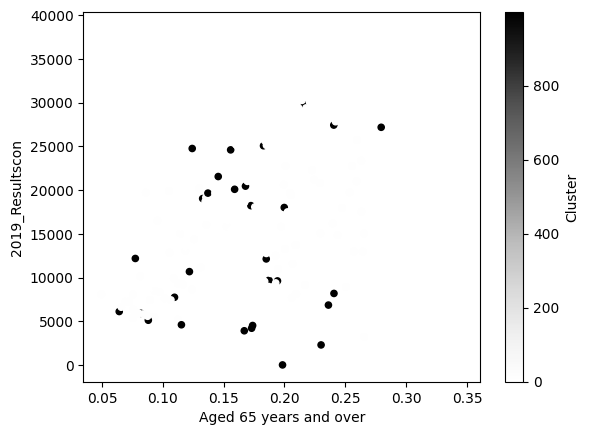

In [13]:
df.plot.scatter(x="Aged 65 years and over", y="2019_Resultscon", c="Cluster")

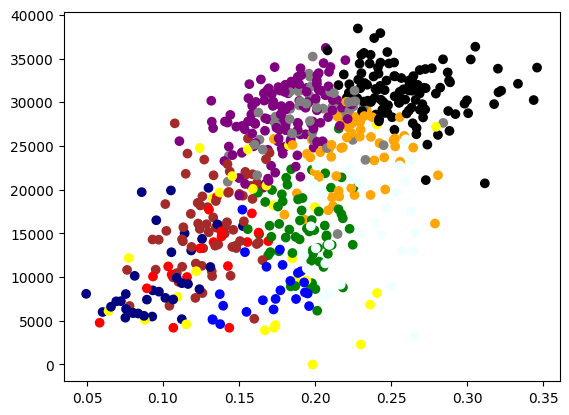

In [21]:
colours = ["red", "green", "orange", "blue", "purple", "black", "brown", "yellow", "navy", "grey", "azure"]
cluster_colours ={}
for k,c  in enumerate(list(set(list(df["Cluster"])))):
    cluster_colours[c] = colours[k]

plt.scatter(df["Aged 65 years and over"], df["2019_Resultscon"], c=[cluster_colours[c] for c in df["Cluster"]])

In [18]:
for c, col in cluster_colours.items():
    print(cluster_des_dict[c], col)

Labour red
Brexit green
Marginal orange
SNP blue
Brexit Conservative purple
Conservative black
Immigrant brown
Anomalous yellow
Remain navy
Lib-Con grey
Nat-Conservative silver


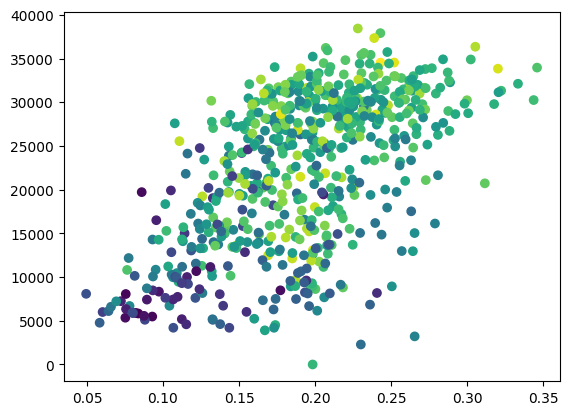

In [6]:
plt.scatter(df["Aged 65 years and over"], df["2019_Resultscon"], c=df["Ref16_Results"])